In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csecicids2018-cleaned/cleaned_ids2018_sampled.csv


In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/csecicids2018-cleaned/cleaned_ids2018_sampled.csv")

# Display the first few rows
df.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg',
  

In [6]:
print(df["Label"].value_counts())  # Count of each label
print(df["Label"].value_counts(normalize=True) * 100)  # Percentage distribution

Label
1     971016
4     137185
5      57507
2      38703
3      37323
6       8377
7       2234
8        332
9        103
10        55
11        11
Name: count, dtype: int64
Label
1     77.504817
4     10.949869
5      4.590109
2      3.089206
3      2.979057
6      0.668638
7      0.178314
8      0.026500
9      0.008221
10     0.004390
11     0.000878
Name: proportion, dtype: float64


In [7]:
df.shape

(1252846, 79)

In [8]:
# Mapping of encoded labels to actual attack types
label_mapping = {
    1: "Benign",
    2: "Brute Force - FTP",
    3: "Brute Force - SSH",
    4: "DoS - GoldenEye",
    5: "DoS - Slowloris",
    6: "DoS - Hulk",
    7: "DoS - Slowhttptest",
    8: "Web Attack - Brute Force",
    9: "Web Attack - XSS",
    10: "Web Attack - SQL Injection",
    11: "Heartbleed Attack"
}

# Replace encoded labels with actual labels
df["Label"] = df["Label"].map(label_mapping)

# Keep only relevant labels (Benign and Brute Force attacks)
df_filtered = df[df["Label"].isin(["Benign", "Brute Force - FTP", "Brute Force - SSH"])]

# Display the first few rows to confirm changes
print(df_filtered.head())

# Save the cleaned dataset (optional)
df_filtered.to_csv("filtered_dataset.csv", index=False)

   Unnamed: 0  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      146275      3389         6        5206015             9            11   
1      512109       443         6       60991608            14            14   
2      807703        53        17          27292             1             1   
3      491912       443         6       70343424            17            20   
4      858679        53        17         137267             2             2   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0             1213             1948              661                0  ...   
1             1211             3396              875                0  ...   
2               45              163               45               45  ...   
3             1118             5653              258                0  ...   
4               94              214               47               47  ...   

   Fwd Seg Size Min    Active Mean     Active Std 

In [9]:
df_filtered.shape

(1047042, 79)

In [10]:
import pandas as pd

# List of columns to drop
drop_columns = [
    'Unnamed: 0', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Fwd Blk Rate Avg', 
    'Bwd Blk Rate Avg', 'Fwd Byts/b Avg', 'Bwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Bwd Pkts/b Avg',
    'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'FIN Flag Cnt', 'SYN Flag Cnt', 
    'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'Init Fwd Win Byts', 
    'Init Bwd Win Byts'
]

# Drop the columns
df_cleaned = df_filtered.drop(columns=drop_columns)

# Display the first few rows to verify
print(df_cleaned.head())

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

print("✅ Dataset cleaned and saved as 'cleaned_dataset.csv'")

   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      3389         6        5206015             9            11   
1       443         6       60991608            14            14   
2        53        17          27292             1             1   
3       443         6       70343424            17            20   
4        53        17         137267             2             2   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0             1213             1948              661                0   
1             1211             3396              875                0   
2               45              163               45               45   
3             1118             5653              258                0   
4               94              214               47               47   

   Fwd Pkt Len Mean  ...  Fwd Seg Size Min    Active Mean     Active Std  \
0        134.777778  ...                20       0.000000       0.000000   


In [11]:
df_cleaned.shape

(1047042, 53)

In [12]:
import numpy as np

# Compute correlation matrix (excluding the Label column)
corr_matrix = df_cleaned.drop(columns=["Label"]).corr().abs()

# Find pairs of highly correlated features (above threshold, e.g., 0.9)
high_corr_features = set()
threshold = 0.9  # Adjust as needed

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly Correlated Features (To Drop):", high_corr_features)

# Drop the correlated columns
df_cleaned = df_cleaned.drop(columns=high_corr_features)

# Display the cleaned dataset
print("\nDataset after removing highly correlated features:")
print(df_cleaned.head())

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset_final.csv", index=False)

print("\n✅ Final cleaned dataset saved as 'cleaned_dataset_final.csv'")

Highly Correlated Features (To Drop): {'Pkt Len Std', 'Bwd Header Len', 'Idle Std', 'Fwd IAT Mean', 'Flow IAT Mean', 'Subflow Fwd Pkts', 'Active Max', 'Pkt Len Max', 'Bwd IAT Max', 'Pkt Len Min', 'Active Min', 'Bwd Pkt Len Std', 'Fwd Pkt Len Std', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Max', 'Idle Max', 'Subflow Fwd Byts', 'Pkt Len Mean', 'Fwd Header Len', 'Fwd IAT Min', 'Fwd IAT Std', 'Idle Mean'}

Dataset after removing highly correlated features:
   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      3389         6        5206015             9            11   
1       443         6       60991608            14            14   
2        53        17          27292             1             1   
3       443         6       70343424            17            20   
4        53        17         137267             2             2   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0             1213             1948              661 

In [13]:
df_cleaned.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Max',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min',
       'Pkt Len Var', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean',
       'Active Std', 'Idle Min', 'Label'],
      dtype='object')

In [15]:
# List of columns to drop
drop_columns = [
    'Dst Port', 'Flow Duration', 'Flow Byts/s', 'Flow Pkts/s',
    'Fwd IAT Tot', 'Fwd IAT Max', 'Tot Bwd Pkts', 'TotLen Bwd Pkts',
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd IAT Tot',
    'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min', 'Active Mean',
    'Active Std', 'Idle Min'
]

# Drop the columns
df_final = df_cleaned.drop(columns=drop_columns)

# Display the final dataset
print("\nFinal Dataset Columns:", df_final.columns)

# Save the final dataset
df_final.to_csv("wpa2_detection_dataset.csv", index=False)



Final Dataset Columns: Index(['Protocol', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Flow IAT Std', 'Flow IAT Min',
       'Pkt Len Var', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')


In [16]:
df_final.shape

(1047042, 12)

In [17]:
df_final["Label"].unique()

array(['Benign', 'Brute Force - SSH', 'Brute Force - FTP'], dtype=object)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target label
X = df_final.drop(columns=["Label"])
y = df_final["Label"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📊 Classification Report:\n", classification_rep)
print("🌀 Confusion Matrix:\n", conf_matrix)


✅ Model Accuracy: 0.9999

📊 Classification Report:
                    precision    recall  f1-score   support

           Benign       1.00      1.00      1.00    194204
Brute Force - FTP       1.00      1.00      1.00      7741
Brute Force - SSH       1.00      1.00      1.00      7464

         accuracy                           1.00    209409
        macro avg       1.00      1.00      1.00    209409
     weighted avg       1.00      1.00      1.00    209409

🌀 Confusion Matrix:
 [[194198      2      4]
 [     0   7741      0]
 [     1      4   7459]]


In [19]:
import pickle

# 💾 Save the model to a .pkl file
with open("wpa2_key_cracking_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("✅ Random Forest model saved as 'wpa2_key_cracking_model.pkl'")

✅ Random Forest model saved as 'wpa2_key_cracking_model.pkl'


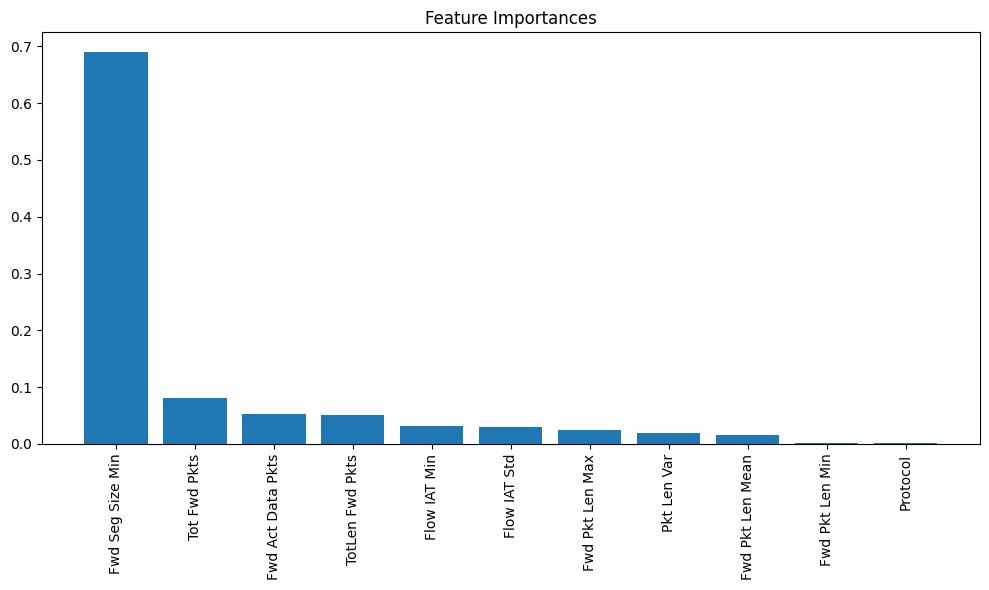

In [20]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [21]:
df_final.head()

,Protocol,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Flow IAT Std,Flow IAT Min,Pkt Len Var,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,6,9,1213,661,0,134.777778,4.873823e+05,54,79648.561905,6,20,Benign
1,6,14,1211,875,0,86.500000,4.218116e+06,1,158541.194581,9,20,Benign
2,17,1,45,45,45,45.000000,0.000000e+00,27292,4641.333333,0,8,Benign
3,6,17,1118,258,0,65.764706,9.874980e+06,8,118021.559744,9,20,Benign
4,17,2,94,47,47,47.000000,4.240885e+04,259,1080.000000,1,8,Benign


In [22]:
# List of columns to drop
drop_columns = [
    'Protocol'
]

# Drop the columns
df_final = df_final.drop(columns=drop_columns)

# Display the final dataset
print("\nFinal Dataset Columns:", df_final.columns)



Final Dataset Columns: Index(['Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Flow IAT Std', 'Flow IAT Min', 'Pkt Len Var',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Separate features and target label
X = df_final.drop(columns=["Label"])
y = df_final["Label"]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📊 Classification Report:\n", classification_rep)
print("🌀 Confusion Matrix:\n", conf_matrix)

✅ Model Accuracy: 0.9999

📊 Classification Report:
                    precision    recall  f1-score   support

           Benign       1.00      1.00      1.00    194204
Brute Force - FTP       1.00      1.00      1.00      7741
Brute Force - SSH       1.00      1.00      1.00      7464

         accuracy                           1.00    209409
        macro avg       1.00      1.00      1.00    209409
     weighted avg       1.00      1.00      1.00    209409

🌀 Confusion Matrix:
 [[194198      2      4]
 [     0   7741      0]
 [     2      4   7458]]


In [24]:
import pickle

# 💾 Save the model to a .pkl file
with open("wpa2_key_cracking_model_no_protocol.pkl", "wb") as file:
    pickle.dump(clf, file)

In [25]:
df_final.columns

Index(['Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Flow IAT Std', 'Flow IAT Min', 'Pkt Len Var',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')